# EXIT SURVEYS ANALYSIS

In this project, the objective is to analyze the exit surveys of employees to know the level of satisfaction with the work. The data comes from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We will attempt to provide an answer for these 2 questions:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

## Summary of results
After analysis, we can observe that employees who have been there for more than 7 years are more inclined to resign due to "dissatisfaction"

## Technical skills used:
- data cleaning
- data combining
- data aggregation
- data visualization

# EXPLORING DATA

In [48]:
# import library
import pandas as pd
import numpy as np

## Link to the data files:
- https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey
- https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey

In [49]:
# Read the 2 files in dataframe
dete_survey = pd.read_csv('dete_survey.csv',encoding='latin-1',)
tafe_survey = pd.read_csv('tafe_survey.csv',encoding='latin-1',)

In [50]:
# info on the dete survey data
print (dete_survey.info())
print(dete_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

In [51]:
# info on tafe survey data
print (tafe_survey.info())
print(tafe_survey.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null int64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-nu

## Some observations on data set:
- All the columns except ID are of type object. Some type conversions may be necessary to manipulate data
- Some columns have few data compared to the other columns

In [52]:
dete_survey['Disability'].isnull().value_counts()

True     799
False     23
Name: Disability, dtype: int64

In [53]:
# set "not stated" to NaN when opening csv file
dete_survey = pd.read_csv('dete_survey.csv',encoding='latin-1',na_values="Not Stated")

We will drop the columns not needed for our investigation

In [54]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[[28, 49]],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[[17,66]],axis=1)

## Standard column names for both data sets

For common columns across the 2 data sets, we will change the name of the columns to easily combine the data later

In [55]:
dete_survey_updated.columns = dete_survey_updated.columns.str.replace(' ', '_').str.replace('\s+', ' ').str.strip().str.lower()

In [56]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID': 'id',
'CESSATION YEAR': 'cease_date',
'Reason for ceasing employment': 'separationtype',
'Gender. What is your Gender?': 'gender',
'CurrentAge. Current Age': 'age',
'Employment Type. Employment Type': 'employment_status',
'Classification. Classification': 'position',
'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'})

Explore unique values in dete survey for the separation type

In [57]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

Unique values in tafe survey for the separation type

In [58]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Select only the data for survey respondents who have a Resignation separation type.

In [59]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()

In [60]:
# Verify unique values in 'separationtype' columns
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [61]:
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'] == 'Resignation'].copy()

In [62]:
# Verify unique values in 'separationtype' columns
tafe_resignations['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Verify start date and end date in the dete data set

In [63]:
dete_resignations['cease_date'].value_counts()

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
2010         1
07/2006      1
07/2012      1
09/2010      1
Name: cease_date, dtype: int64

In [64]:
pattern=r"([1-2][0-9]{3})"
dete_resignations['cease_date'] = dete_resignations['cease_date'].astype('str').str.extract(pattern, expand=False).astype('float')
print (dete_resignations['cease_date'].head())

3     2012.0
5     2012.0
8     2012.0
9     2012.0
11    2012.0
Name: cease_date, dtype: float64


In [65]:
dete_resignations['cease_date'].value_counts()

2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64

In [66]:
dete_resignations['dete_start_date'].value_counts()

2011.0    24
2008.0    22
2007.0    21
2012.0    21
2010.0    17
2005.0    15
2004.0    14
2009.0    13
2006.0    13
2013.0    10
2000.0     9
1999.0     8
1996.0     6
2002.0     6
1992.0     6
1998.0     6
2003.0     6
1994.0     6
1993.0     5
1990.0     5
1980.0     5
1997.0     5
1991.0     4
1989.0     4
1988.0     4
1995.0     4
2001.0     3
1985.0     3
1986.0     3
1983.0     2
1976.0     2
1974.0     2
1971.0     1
1972.0     1
1984.0     1
1982.0     1
1987.0     1
1975.0     1
1973.0     1
1977.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [67]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

## Calculate years of service in dete data set

In [68]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']

## search cases when employees leave because of dissatisfaction

### tafe dataset

In [69]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities

WE will use  'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' to determine the level of satisfaction of employees

In [70]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [71]:
# create the function update_values to set to TRUE a new column
# of the tafe data set when employees leave because of "dissatisfaction"
def update_vals(element):
    if pd.isnull(element):
        return np.nan
    elif element == '-':
        return False
    else:
        return True
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = \
tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

In [72]:
tafe_resignations['dissatisfied'] = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis='columns', skipna=False).copy()
    

In [73]:
tafe_resignations['dissatisfied'].value_counts()

False    241
True      91
Name: dissatisfied, dtype: int64

### dete data set

Create a subset of dete columns that indicate "dissatisfaction" 

In [74]:
dete_dis_col = ['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment', \
'lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']

In [75]:
# use any() method to create a new column in the dataframe
dete_resignations['dissatisfied'] = dete_resignations[dete_dis_col].any(axis='columns', skipna=False)

In [76]:
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [77]:
dete_resignations_up =  dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

## Combine the datasets

### add a new column to easily distinguish each of them

In [78]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

### combine

In [79]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up], ignore_index=True)
combined.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Classification. Classification,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,...,stress_and_pressure_support,study/travel,torres_strait,traumatic_incident,wellness_programs,work_life_balance,work_location,worklife_balance,workload,workplace_issue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,False,NaN,False,N,False,False,A,False,N
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,False,NaN,False,D,False,False,D,False,D
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SD,False,NaN,False,D,False,False,SD,False,D
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SD,False,NaN,False,SD,False,False,SD,False,SD
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,N,False,NaN,False,N,False,False,N,False,D
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SA,False,NaN,False,A,False,False,SA,False,A
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,False,NaN,False,N,False,False,A,False,SA
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SD,False,NaN,False,M,False,False,M,False,SD
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,D,False,NaN,False,SD,False,False,D,False,A
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,A,False,NaN,False,NaN,False,False,SA,False,SA


In [80]:
# keep a copy of combined dataframe
combined_age = combined.copy()

In [81]:
# drop columns tht contains less than 500 non null values
combined = combined.dropna(thresh=500,axis=1)


## Cleaning institute_service column

In [82]:
combined['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
0.0                   20
3.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
22.0                   6
17.0                   6
18.0                   5
16.0                   5
11.0                   4
23.0                   4
24.0                   4
19.0                   3
32.0                   3
21.0                   3
39.0                   3
30.0                   2
25.0                   2
26.0                   2
28.0                   2
36.0                   2


In [83]:
# Extract the years of service and convert the type to float
combined['institute_service_up'] = combined['institute_service'].astype('str').str.extract(r'(\d+)')
combined['institute_service_up'] = combined['institute_service_up'].astype('float')

# Check the years extracted are correct
combined['institute_service_up'].value_counts()

1.0     159
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
17.0      6
10.0      6
12.0      6
14.0      6
22.0      6
16.0      5
18.0      5
24.0      4
23.0      4
39.0      3
19.0      3
21.0      3
32.0      3
28.0      2
36.0      2
25.0      2
30.0      2
26.0      2
29.0      1
38.0      1
42.0      1
27.0      1
41.0      1
35.0      1
49.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service_up, dtype: int64

## Map years of service to a category

In [84]:
def map_years(val):
    if val < 3:
        return 'New'
    elif 3<=val<7:
        return 'Experienced'
    elif 7<=val<11:
        return 'Established'
    elif val >= 11:
        return 'Veteran'
    elif pd.isnull(val):
        return np.nan
combined['service_cat'] = combined['institute_service_up'].apply(map_years)
combined['service_cat'].value_counts()

New            193
Experienced    172
Veteran        136
Established     62
Name: service_cat, dtype: int64

## Result analysis

In [85]:
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

### Handling missing value with fillna()

In [86]:
# value that occurs more frequently: False
combined['dissatisfied'] = combined['dissatisfied'].fillna(True)
combined_age['dissatisfied'] = combined_age['dissatisfied'].fillna(True)
combined['dissatisfied'].value_counts(dropna=False)

False    403
True     248
Name: dissatisfied, dtype: int64

### Group data by service category

In [87]:
table = pd.pivot_table(combined, values='dissatisfied', index ='service_cat')

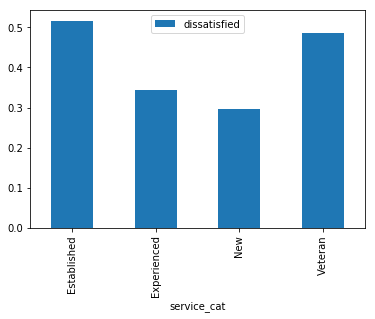

In [88]:
%matplotlib inline
table.plot(kind = 'bar')

### Group data by employee age

In [89]:
combined_age['age'].value_counts(dropna=False)
#combined['age'].value_counts(dropna=False)

NaN              345
41-45             48
46-50             42
36-40             41
26-30             35
51-55             32
21-25             29
31-35             29
56-60             26
61 or older       23
20 or younger      1
Name: age, dtype: int64

In [90]:
# Fill nan values to be able to plot the data
combined_age['age']= combined_age['age'].fillna('Undef')
combined_age['age'].value_counts(dropna=False)

Undef            345
41-45             48
46-50             42
36-40             41
26-30             35
51-55             32
21-25             29
31-35             29
56-60             26
61 or older       23
20 or younger      1
Name: age, dtype: int64

In [91]:
# Group data by age
table_age = pd.pivot_table(combined_age, values='dissatisfied', index ='age')

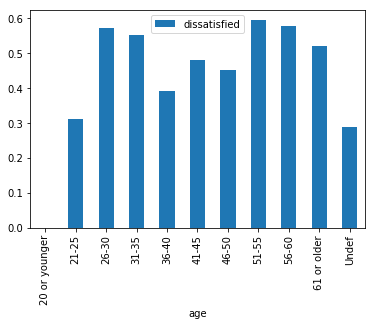

In [92]:
# plot the result
table_age.plot(kind = 'bar')

## Conclusion

- From this analysis , we can presume that workers, with more than 7 years of experience, are more inclined to resign due to dissatisfaction, rather than workers with less experience.